# Predict the Critical Temperature of a Superconductor
This notebook will reproduce the result of `predict_tc` in the Python language.

In [ ]:
# Install `pyCHNOSZ` if not installed already.
!pip install pyCHNOSZ

In [55]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pyCHNOSZ
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

Since the original data for the superconducting materials list obtained from [Japan's National Institute for Materials Science (NIMS)](http://supercon.nims.go.jp/index_en.html) is no longer available, the preprocessing steps outlined cannot be reproduced.

In [57]:
# Utilizes provided preprocessed training data
training_df = pd.read_csv('../uci_supercondutor_data/train.csv')
training_data = np.array(training_df)
features_length = len(training_data[0])

# The first 81 columns are features.
X = training_data[:,:features_length-1]

# The last column is temperature critical (labels).
y = training_data[:,features_length-1:features_length]

print(f"Training Data Shape: {training_data.shape}")
print(f"Features Shape: {X.shape}")
print(f"Labels Shape: {y.shape}")

Training Data Shape: (21263, 82)
Features Shape: (21263, 81)
Labels Shape: (21263, 1)


The first predictions will be done with random forests.

In [50]:
forest = RandomForestRegressor(n_estimators=2500)
forest.fit(X, y)

/tmp/ipykernel_785/3361003616.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X, Y)


RandomForestRegressor(n_estimators=2500)

Score: 0.9782383007775134


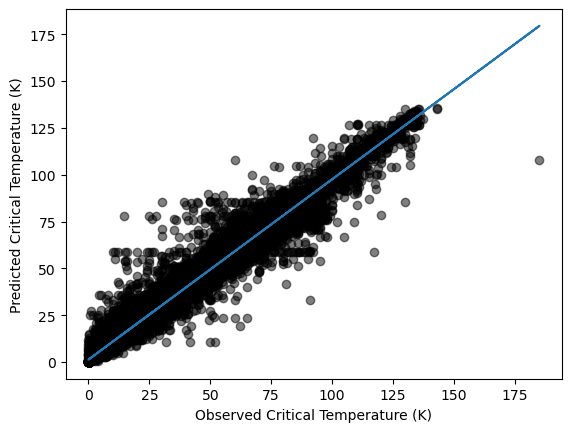

In [53]:
yfit = forest.predict(X)

print(f"Score: {forest.score(X, y)}")

# Plot observed temperatures vs predicted temperatures with scatter plot.
plt.scatter(y, yfit, color=(0, 0, 0, 0.5))
plt.xlabel("Observed Critical Temperature (K)")
plt.ylabel("Predicted Critical Temperature (K)")

# Plot linear trendline
z = np.polyfit(y.ravel(), yfit, 1)
p = np.poly1d(z)
plt.plot(y, p(y))

plt.show()

The next prediction will be done with xgboost.

In [58]:
xgb_model = XGBRegressor()
xgb_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
yfit = xgb_model.predict(X)

print(f"Score: {xgb_model.score(X, y)}")

# Plot observed temperatures vs predicted temperatures with scatter plot.
plt.scatter(y, yfit, color=(0, 0, 0, 0.5))
plt.xlabel("Observed Critical Temperature (K)")
plt.ylabel("Predicted Critical Temperature (K)")

# Plot linear trendline
z = np.polyfit(y.ravel(), yfit, 1)
p = np.poly1d(z)
plt.plot(y, p(y))

plt.show()